In [1]:
from fish_helpers import *
from analysis_scripts.iterative_classify_codestacks_and_parse import *

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
md_path = '/hybedata/Images/Robert/TBI_v2/sham_m3_slide4_2019Nov04/'
cstk_path = os.path.join(md_path,'codestacks_v1')


In [5]:
hip = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/GSE74985_genes.fpkm_tracking',sep='\t')
hip_fpkm = pd.DataFrame(index = hip.gene_short_name)
for column in hip.columns:
    if 'FPKM' in column:
        hip_fpkm[column] = list(hip[column])
hip_fpkm['average'] = np.average(hip_fpkm,axis=1)
hip_fpkm

,dg_d_FPKM,dg_v_FPKM,ca4_FPKM,ca3_d_FPKM,ca3_v_FPKM,ca2_FPKM,ca1_d_FPKM,ca1_v_FPKM,average
gene_short_name,,,,,,,,,
Gnai3,8.131250,11.763400,10.673600,18.301500,10.505900,10.71920,7.859310,9.818570,10.971591
Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Cdc45,0.000000,2.597860,1.023760,0.621743,1.248480,2.20752,0.201932,1.372640,1.159242
H19,0.000000,0.000000,0.008192,0.178003,0.000000,0.00000,0.000000,0.000000,0.023274
Scml2,0.011255,0.303125,0.039321,0.031681,0.185555,0.69732,0.011220,0.088365,0.170980
...,...,...,...,...,...,...,...,...,...
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


Pos204 17  failed to load spotcalls
158


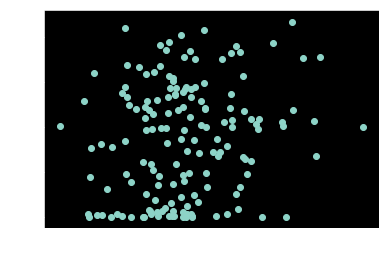

SpearmanrResult(correlation=0.14640569224227853, pvalue=0.0664194743266938)

In [187]:
subset = pickle.load(open(os.path.join(cstk_path,'subset.pkl'),'rb'))
hybedatas = [HybeData(os.path.join(cstk_path,pos)) for pos in subset]
spotcalls = spotcat(hybedatas)
hip_fpkm.index = [i.capitalize() for i in hip_fpkm.index]
shared_genes = [i for i in spotcalls.gene.unique() if i in hip_fpkm.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(spotcalls.gene).items():
    if gn in shared_genes:
        c.append(cc)
        ts = hip_fpkm['average'].loc[gn]
        if isinstance(ts,float):
            s.append(ts)
        else:
            s.append(ts.iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

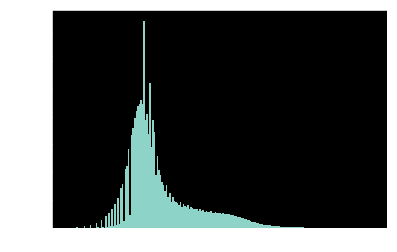

In [188]:
plt.hist(np.log10(spotcalls.ave),bins=200)
plt.show()

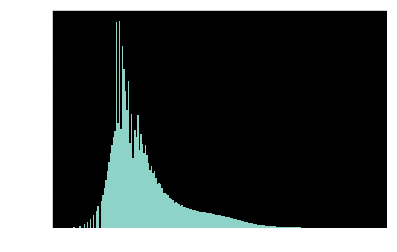

In [189]:
plt.hist(np.log10(spotcalls.ssum),bins=200)
plt.show()

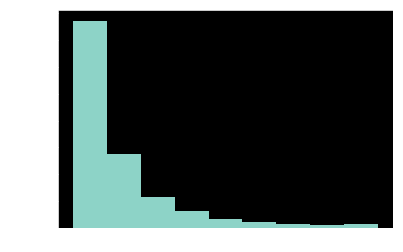

In [190]:
plt.hist(spotcalls.npixels,bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()

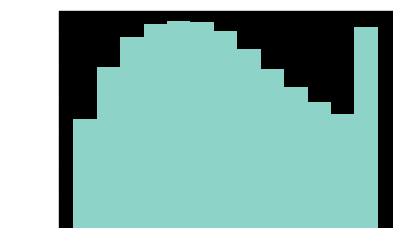

In [191]:
plt.hist(spotcalls.z,bins=spotcalls.z.unique())
plt.show()

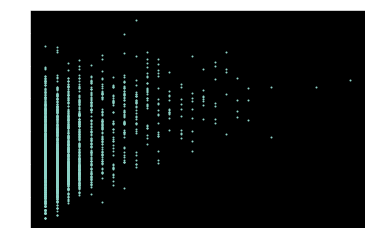

In [192]:
mask = random.sample(list(spotcalls.index),5000)
plt.scatter(spotcalls.loc[mask].npixels,np.log10(spotcalls.loc[mask].ave),s=1)
plt.show()

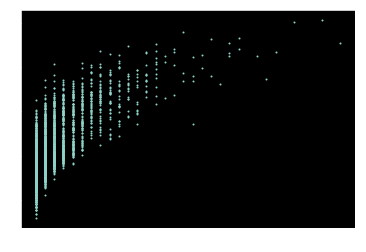

In [193]:
mask = random.sample(list(spotcalls.index),5000)
plt.scatter(spotcalls.loc[mask].npixels,np.log10(spotcalls.loc[mask].ssum),s=1)
plt.show()

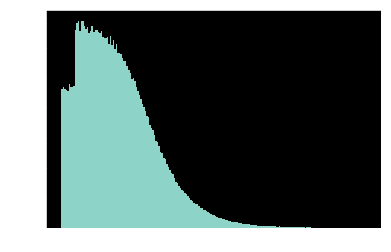

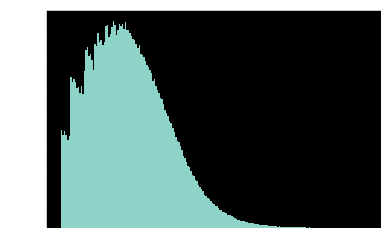

0.07443372712946095
158


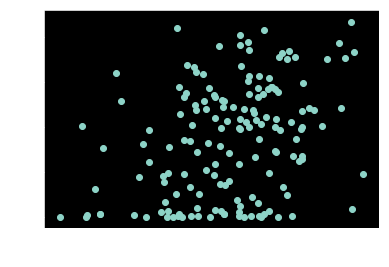

SpearmanrResult(correlation=0.3213619331293182, pvalue=3.836194769117959e-05)

In [194]:
filtered_spotcalls = spotcalls[(spotcalls.ave>10**1.5)&
                               (spotcalls.npixels<10)&
                               (spotcalls.npixels>1)&
                               (spotcalls.ssum>10**2.5)&
                               (spotcalls.z>5)&
                               (spotcalls.z<25)]
plt.hist(np.log10(filtered_spotcalls.ave),bins=200)
plt.show()
plt.hist(np.log10(filtered_spotcalls.ssum),bins=200)
plt.show()
print(len(filtered_spotcalls)/len(spotcalls))
hip_fpkm.index = [i.capitalize() for i in hip_fpkm.index]
shared_genes = [i for i in filtered_spotcalls.gene.unique() if i in hip_fpkm.index]
shared_genes = [i for i in shared_genes if not 'Malat' in i]
print(len(shared_genes))
c = []
s = []
for gn,cc in Counter(filtered_spotcalls.gene).items():
    if gn in shared_genes:
        c.append(cc)
        ts = hip_fpkm['average'].loc[gn]
        if isinstance(ts,float):
            s.append(ts)
        else:
            s.append(ts.iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

In [195]:
from scipy.stats import pearsonr
pearsonr(c,s)

(0.29321006908707, 0.0001848676596341497)

In [196]:
print(len(spotcalls))
print(len(filtered_spotcalls))

13420650
998949


In [197]:
xy = np.stack(spotcalls.centroid)
spotcalls['x'] = list(xy[:,1])
spotcalls['y'] = list(xy[:,0])

Pos195
310585


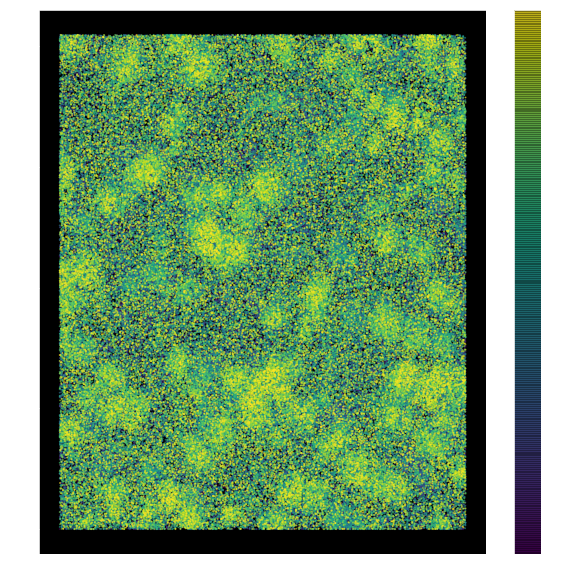

In [198]:
pos = spotcalls.posname.unique()[5]
print(pos)
pos_spotcalls = spotcalls[spotcalls.posname==pos]
print(len(pos_spotcalls))
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=list(pos_spotcalls.z))
plt.colorbar()
plt.show()

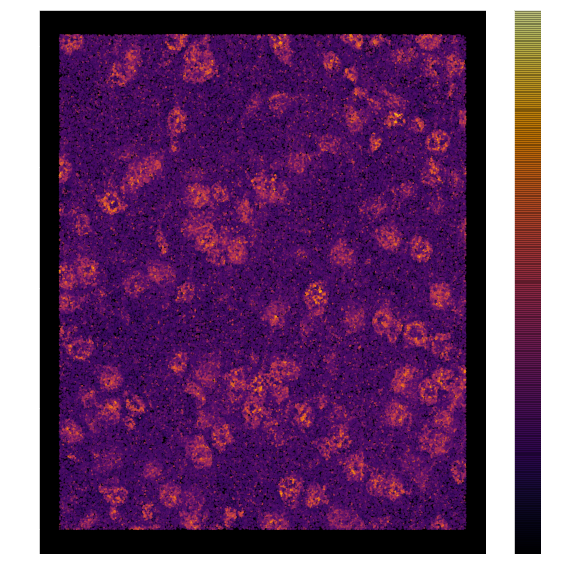

In [199]:
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=np.log10(pos_spotcalls.ave),cmap='inferno')
plt.colorbar()
plt.show()

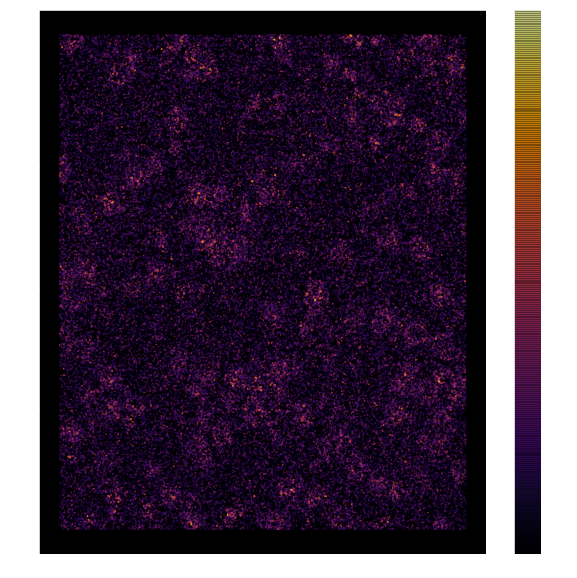

In [200]:
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=np.log10(pos_spotcalls.npixels),cmap='inferno')
plt.colorbar()
plt.show()

Pos195
31558


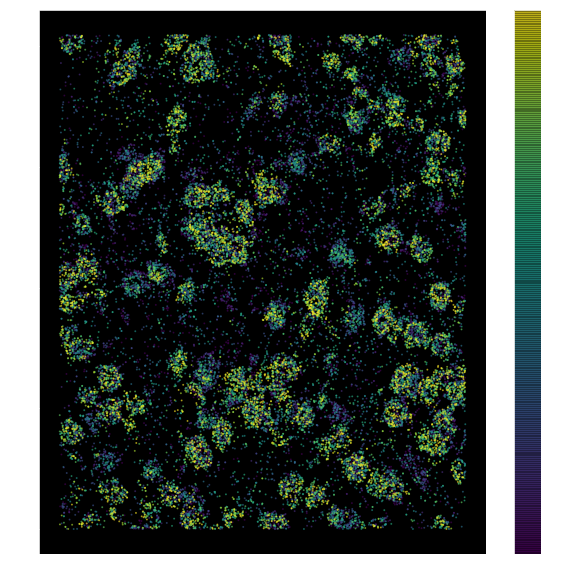

In [201]:
pos = spotcalls.posname.unique()[5]
print(pos)
filtered_spotcalls = spotcalls[(spotcalls.ave>10**1.5)&
                               (spotcalls.npixels<10)&
                               (spotcalls.npixels>1)&
                               (spotcalls.ssum>10**2.5)&
                               (spotcalls.z>5)&
                               (spotcalls.z<25)]
pos_spotcalls = filtered_spotcalls[filtered_spotcalls.posname==pos]
print(len(pos_spotcalls))
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=list(pos_spotcalls.z))
plt.colorbar()
plt.show()

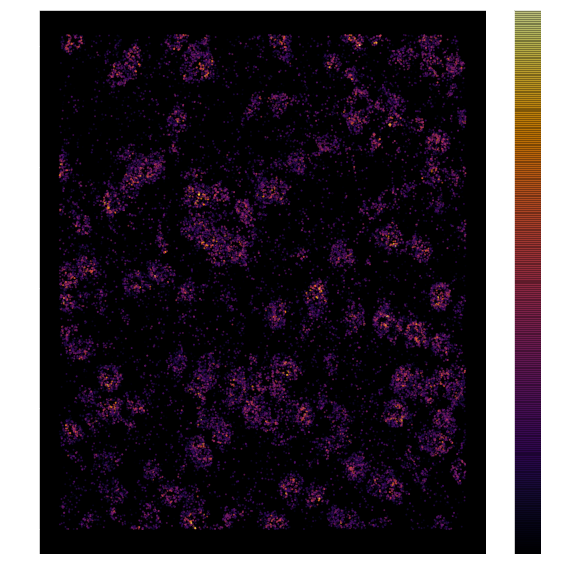

In [202]:
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=np.log10(pos_spotcalls.ave),cmap='inferno')
plt.colorbar()
plt.show()

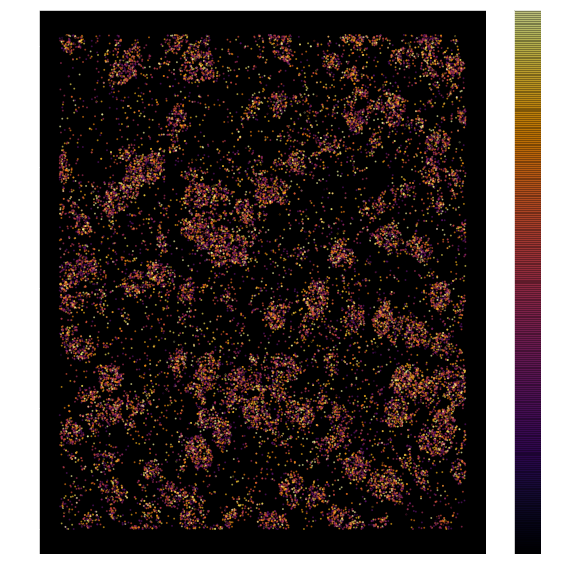

In [203]:
plt.figure(figsize=[10,10])
plt.scatter(pos_spotcalls.x,pos_spotcalls.y,s=1,alpha=0.5,c=np.log10(pos_spotcalls.npixels),cmap='inferno')
plt.colorbar()
plt.show()

In [68]:
seqfish = pd.read_csv('/bigstore/binfo/mouse/Brain/FISH/seqFISH_Neuron2016_Hippocampus2/counts.csv',index_col=0)
seqfish

,Tal1,Dmbx1,Emx2,Uncx,Paxip1,Ctnnb1,Prdm1,Rybp,Nfkb2,Tfdp2,...,acta2,alldh1l1,camk2,chat,cldn5,ngef,tiam1,slc1a2,gja1,fbll1
hip2_cell_1,34,14,29,17,31,85,28,30,24,38,...,32,37,56,28,18,20,28,54,11,30
hip2_cell_2,18,15,23,6,36,50,25,43,18,11,...,14,25,16,25,11,9,14,13,6,27
hip2_cell_3,15,11,32,3,42,72,13,34,0,27,...,28,21,46,32,15,21,29,47,13,31
hip2_cell_4,21,20,29,6,44,76,23,29,17,18,...,13,20,57,32,19,19,30,38,8,41
hip2_cell_5,17,1,8,14,15,80,18,28,8,19,...,18,37,48,46,16,14,24,44,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hip2_cell_3581,3,1,0,0,1,6,9,1,1,1,...,3,2,7,3,0,1,7,1,0,5
hip2_cell_3582,0,0,4,2,1,4,7,6,7,0,...,1,4,2,4,2,0,1,0,0,9
hip2_cell_3583,4,3,0,0,9,9,3,0,1,1,...,1,0,0,1,0,0,0,1,0,3
hip2_cell_3584,1,2,6,4,1,5,6,6,4,5,...,0,3,0,3,3,0,3,1,3,3


In [70]:
np.sum(seqfish,axis=0).shape

(249,)

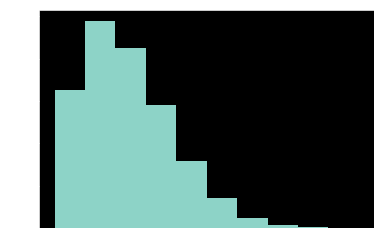

In [71]:
plt.hist(np.sum(seqfish,axis=1))
plt.show()

In [77]:
seqfish['Ahr'].mean()

13.017573221757322

(array([111., 104.,  12.,   9.,   5.,   4.,   2.,   1.,   0.,   1.]),
 array([ 7.3679219 , 12.4651046 , 17.56228731, 22.65947001, 27.75665272,
        32.85383543, 37.95101813, 43.04820084, 48.14538354, 53.24256625,
        58.33974895]),
 <a list of 10 Patch objects>)

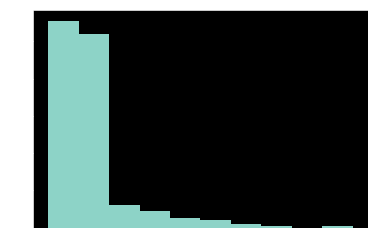

In [78]:
plt.hist(seqfish.mean())

In [121]:
'hello'.lower()

'hello'

243


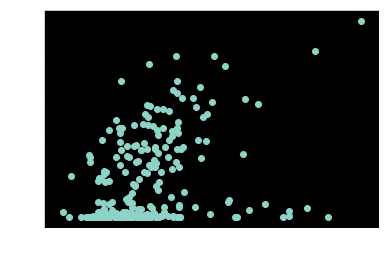

SpearmanrResult(correlation=0.37219082376449203, pvalue=2.117931766020788e-09)

In [124]:
seqfish.columns = [i.capitalize() for i in seqfish.columns]
hip_fpkm.index = [i.capitalize() for i in hip_fpkm.index]
shared_genes = [i for i in seqfish.columns if i in hip_fpkm.index]
print(len(shared_genes))
c = []
s = []
for g in shared_genes:
    c.append(seqfish[g].mean())
    ts = hip_fpkm['average'].loc[g]
    if isinstance(ts,float):
        s.append(ts)
    else:
        s.append(ts.iloc[0])
plt.scatter(np.log10(np.array(c)+1),np.log10(np.array(s)+1))
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()
spearmanr(c,s)

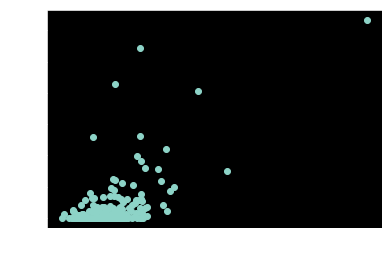

In [92]:
plt.scatter(c,s)
plt.xlabel('sham_m3_slide4_2019Nov04 counts')
plt.ylabel('bulk hippocampus rnaseq')
plt.show()

In [100]:
np.array(shared_genes)[np.array(s)>30]

array(['Ctnnb1', 'Nr3c2', 'Nfia', 'Nr4a3', 'Polr2b', 'Clock', 'Med14',
       'Smarca4', 'Creb1', 'Mtf2', 'Ddx3x', 'Satb1'], dtype='<U8')

In [118]:
hip_fpkm['average'].loc['Vip']

0.067125375

In [106]:
[i for i in seqfish.columns if 'ip' in i]

['Paxip1', 'vip']

In [108]:
seqfish['vip'].mean()/hip_fpkm['average'].loc['Vip']

207.24764682741215

Messing Around with clasiffication